## 比特幣買賣點分析

In [2]:
import requests
res = requests.get('https://www.coingecko.com/en/price_charts/bitcoin/usd')
#res.text

In [7]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'html.parser')
price = soup.select('#coin_portfolio_price_chart_btc')[0]['data-prices']

In [9]:
import pandas
df = pandas.DataFrame(eval(price) )

In [11]:
df.columns = ['datetime', 'price']

In [12]:
df.index = df['datetime']

Populating the interactive namespace from numpy and matplotlib


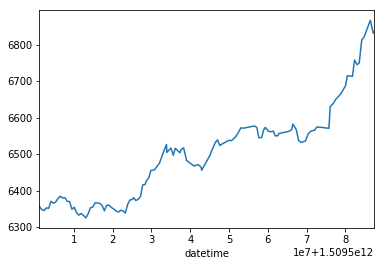

In [15]:
%pylab inline
df['price'].plot(kind='line')

In [16]:
df['mvg30'] = df['price'].rolling(window=30).mean()

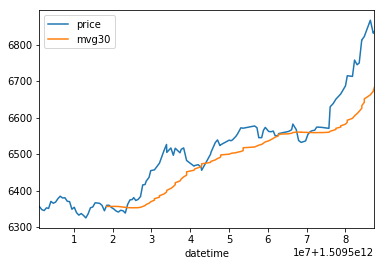

In [17]:
df[['price', 'mvg30']].plot(kind='line')

## 取得經緯度資訊

In [20]:
import requests
key = '<key>'
res = requests.get('https://maps.googleapis.com/maps/api/place/textsearch/json?query=臺北市大安區和平東路三段1巷72弄1~30號&key={}'.format(key))
#res.text

## 使用Plotly
- pip install plotly

In [22]:
! pip install plotly

  Running setup.py bdist_wheel for plotly: started
  Running setup.py bdist_wheel for plotly: finished with status 'done'
  Stored in directory: C:\Users\Student\AppData\Local\pip\Cache\wheels\cc\87\3f\6a282eb21da5d8223472bed40ee023cdcf2e9691b117969a4c
Successfully built plotly


In [27]:
%pylab inline
import plotly
from plotly.graph_objs import Scatter, Layout
plotly.offline.init_notebook_mode(connected=True)
plotly.offline.plot({
    "data": [Scatter(x=[1, 2, 3, 4], y=[4, 3, 2, 1])],
    "layout": Layout(title="hello world")
})

Populating the interactive namespace from numpy and matplotlib


'file://C:\\Users\\Student\\temp-plot.html'

## 使用Google Trends 分析股票

In [28]:
import pandas
data = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/pyfintech/master/data/GoogleTrendsData.csv', index_col='Date',parse_dates=True)

In [31]:
data.tail()

,djia,debt
Date,,
2011-02-02,11891.93,0.190000
2011-02-09,12161.63,0.176667
2011-02-16,12268.19,0.173333
2011-02-24,12212.79,0.180000
2011-03-02,12226.34,0.170000


ERROR:root:Line magic function `%pylabinline` not found.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D6F4518>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D9A7320>], dtype=object)

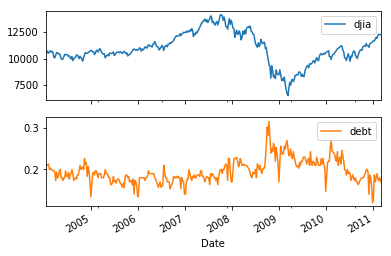

In [33]:
%pylabinline
data.plot(subplots=True)

In [40]:
data['debt_mavg']=data['debt'].rolling(window=3).mean()

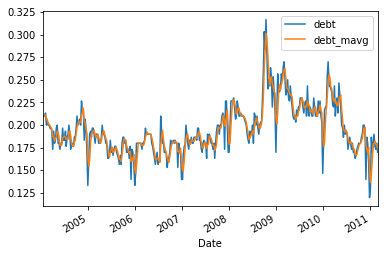

In [42]:
data[['debt', 'debt_mavg']].plot(kind = 'line')

In [44]:
data['debt_mavg'] = data.debt_mavg.shift(1)

In [45]:
data.head()

,djia,debt,debt_mavg
Date,,,
2004-01-14,10485.18,0.210000,NaN
2004-01-22,10528.66,0.210000,NaN
2004-01-28,10702.51,0.210000,NaN
2004-02-04,10499.18,0.213333,0.210000
2004-02-11,10579.03,0.200000,0.211111


In [46]:
data['order']=0

In [48]:
data.head()

,djia,debt,debt_mavg,order
Date,,,,
2004-01-14,10485.18,0.210000,NaN,0
2004-01-22,10528.66,0.210000,NaN,0
2004-01-28,10702.51,0.210000,NaN,0
2004-02-04,10499.18,0.213333,0.210000,0
2004-02-11,10579.03,0.200000,0.211111,0


In [49]:
data['order'][data.debt>data.debt_mavg]=-1
data['order'][data.debt<data.debt_mavg]=1
data.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,djia,debt,debt_mavg,order
Date,,,,
2004-01-14,10485.18,0.210000,NaN,0
2004-01-22,10528.66,0.210000,NaN,0
2004-01-28,10702.51,0.210000,NaN,0
2004-02-04,10499.18,0.213333,0.210000,-1
2004-02-11,10579.03,0.200000,0.211111,1
2004-02-19,10714.88,0.203333,0.207778,1
2004-02-25,10609.62,0.200000,0.205555,1
2004-03-03,10678.14,0.200000,0.201111,1
2004-03-10,10529.48,0.196667,0.201111,1


In [50]:
data['ret_djia']=data.djia.pct_change()

In [51]:
data.head()

,djia,debt,debt_mavg,order,ret_djia
Date,,,,,
2004-01-14,10485.18,0.210000,NaN,0,NaN
2004-01-22,10528.66,0.210000,NaN,0,0.004147
2004-01-28,10702.51,0.210000,NaN,0,0.016512
2004-02-04,10499.18,0.213333,0.210000,-1,-0.018998
2004-02-11,10579.03,0.200000,0.211111,1,0.007605


In [52]:
data['ret_djia']=data['ret_djia'].shift(-1)

In [53]:
data.head()

,djia,debt,debt_mavg,order,ret_djia
Date,,,,,
2004-01-14,10485.18,0.210000,NaN,0,0.004147
2004-01-22,10528.66,0.210000,NaN,0,0.016512
2004-01-28,10702.51,0.210000,NaN,0,-0.018998
2004-02-04,10499.18,0.213333,0.210000,-1,0.007605
2004-02-11,10579.03,0.200000,0.211111,1,0.012841


In [54]:
data['ret_google']=data.order*data.ret_djia

In [55]:
data.head()

,djia,debt,debt_mavg,order,ret_djia,ret_google
Date,,,,,,
2004-01-14,10485.18,0.210000,NaN,0,0.004147,0.000000
2004-01-22,10528.66,0.210000,NaN,0,0.016512,0.000000
2004-01-28,10702.51,0.210000,NaN,0,-0.018998,-0.000000
2004-02-04,10499.18,0.213333,0.210000,-1,0.007605,-0.007605
2004-02-11,10579.03,0.200000,0.211111,1,0.012841,0.012841


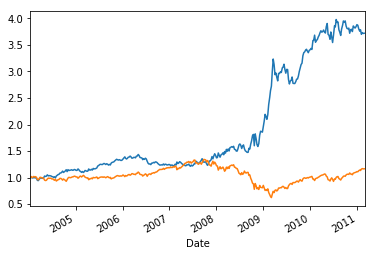

In [56]:
(1+data.ret_google).cumprod().plot();
(1+data.ret_djia).cumprod().plot();

## 找出感冒與康那香股價的相關聯

In [60]:
import pandas
flu = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/pyfintech/master/data/flu.csv', index_col='Date', parse_dates=True)

In [61]:
flu.head()

,cold,flu
Date,,
2004-01-04,32,1
2004-01-11,26,1
2004-01-18,17,1
2004-01-25,26,2
2004-02-01,33,3


In [67]:
import pandas_datareader
tw9919 =  pandas_datareader.get_data_yahoo('9919.TW', start=datetime.datetime(2004, 1, 1))

In [69]:
tw9919.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-01-01,13.4179,13.4179,13.4179,13.4179,8.829000,0.0
2004-01-02,13.4179,13.6793,13.2437,13.5922,8.943687,2379223.0
2004-01-05,13.5050,13.6793,13.4179,13.5050,8.886312,647757.0
2004-01-06,13.5922,13.6793,13.4179,13.6793,9.000999,901191.0
2004-01-07,13.6793,13.6793,13.3308,13.3308,8.771686,573860.0


In [72]:
from datetime import datetime, timedelta
tw9919.index = tw9919.index.map(lambda e: e-timedelta(days=1))

In [73]:
tw9919.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-31,13.4179,13.4179,13.4179,13.4179,8.829000,0.0
2004-01-01,13.4179,13.6793,13.2437,13.5922,8.943687,2379223.0
2004-01-04,13.5050,13.6793,13.4179,13.5050,8.886312,647757.0
2004-01-05,13.5922,13.6793,13.4179,13.6793,9.000999,901191.0
2004-01-06,13.6793,13.6793,13.3308,13.3308,8.771686,573860.0


In [74]:
results = tw9919.merge(flu, left_index=True, right_index=True, how='inner')

In [78]:
data = results[['Adj Close', 'cold', 'flu']]

In [80]:
data.head()

,Adj Close,cold,flu
Date,,,
2004-01-04,8.886312,32,1
2004-01-11,8.829000,26,1
2004-01-18,8.829000,17,1
2004-01-25,8.829000,26,2
2004-02-01,9.287691,33,3


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 623 entries, 2004-01-04 to 2016-07-31
Data columns (total 3 columns):
Adj Close    619 non-null float64
cold         623 non-null int64
flu          623 non-null int64
dtypes: float64(1), int64(2)
memory usage: 19.5 KB


Populating the interactive namespace from numpy and matplotlib


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DAF0160>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000E182F28>], dtype=object)

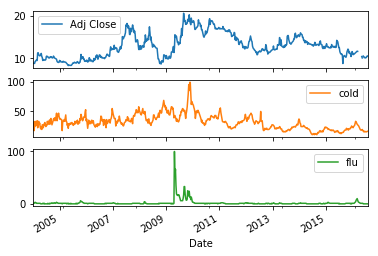

In [83]:
%pylab inline
data.plot(kind = 'line', subplots=True)

In [87]:
data['cold_mavg'] = data['cold'].rolling(window= 3).mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [88]:
data['flu_mavg'] = data['flu'].rolling(window= 3).mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [89]:
data.head()

,Adj Close,cold,flu,cold_mavg,flu_mavg
Date,,,,,
2004-01-04,8.886312,32,1,NaN,NaN
2004-01-11,8.829000,26,1,NaN,NaN
2004-01-18,8.829000,17,1,25.000000,1.000000
2004-01-25,8.829000,26,2,23.000000,1.333333
2004-02-01,9.287691,33,3,25.333333,2.000000


In [90]:

data['cold_mavg'] = data.cold_mavg.shift(1)
data['flu_mavg'] = data.flu_mavg.shift(1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [91]:
data.head()

,Adj Close,cold,flu,cold_mavg,flu_mavg
Date,,,,,
2004-01-04,8.886312,32,1,NaN,NaN
2004-01-11,8.829000,26,1,NaN,NaN
2004-01-18,8.829000,17,1,NaN,NaN
2004-01-25,8.829000,26,2,25.0,1.000000
2004-02-01,9.287691,33,3,23.0,1.333333


In [92]:
data['cold_order'] = 0
# 黃金交叉做多
data['cold_order'][data.cold > data.cold_mavg] = 1 
# 死亡交叉做空
data['cold_order'][data.cold < data.cold_mavg] = -1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5233: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2862: Setti

In [93]:
data.head()

,Adj Close,cold,flu,cold_mavg,flu_mavg,cold_order
Date,,,,,,
2004-01-04,8.886312,32,1,NaN,NaN,0
2004-01-11,8.829000,26,1,NaN,NaN,0
2004-01-18,8.829000,17,1,NaN,NaN,0
2004-01-25,8.829000,26,2,25.0,1.000000,1
2004-02-01,9.287691,33,3,23.0,1.333333,1


In [95]:
data['ret_tw9919'] = data['Adj Close'].pct_change()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [98]:
data.head(3)

,Adj Close,cold,flu,cold_mavg,flu_mavg,cold_order,ret_tw9919
Date,,,,,,,
2004-01-04,8.886312,32,1,NaN,NaN,0,NaN
2004-01-11,8.829000,26,1,NaN,NaN,0,-0.006449
2004-01-18,8.829000,17,1,NaN,NaN,0,0.000000


In [99]:
data['ret_tw9919'] = data['ret_tw9919'].shift(-1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [101]:
data.head()

,Adj Close,cold,flu,cold_mavg,flu_mavg,cold_order,ret_tw9919
Date,,,,,,,
2004-01-04,8.886312,32,1,NaN,NaN,0,-0.006449
2004-01-11,8.829000,26,1,NaN,NaN,0,0.000000
2004-01-18,8.829000,17,1,NaN,NaN,0,0.000000
2004-01-25,8.829000,26,2,25.0,1.000000,1,0.051953
2004-02-01,9.287691,33,3,23.0,1.333333,1,0.006171


In [102]:
data['ret_google_cold'] = data.cold_order * data.ret_tw9919

In [103]:
data.head()

,Adj Close,cold,flu,cold_mavg,flu_mavg,cold_order,ret_tw9919,ret_google_cold
Date,,,,,,,,
2004-01-04,8.886312,32,1,NaN,NaN,0,-0.006449,-0.000000
2004-01-11,8.829000,26,1,NaN,NaN,0,0.000000,0.000000
2004-01-18,8.829000,17,1,NaN,NaN,0,0.000000,0.000000
2004-01-25,8.829000,26,2,25.0,1.000000,1,0.051953,0.051953
2004-02-01,9.287691,33,3,23.0,1.333333,1,0.006171,0.006171


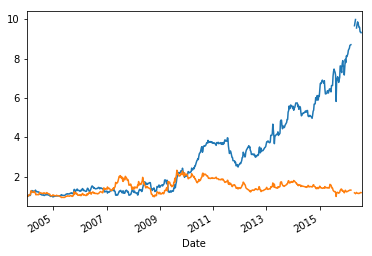

In [104]:
(1 + data.ret_google_cold).cumprod().plot()
(1 + data.ret_tw9919).cumprod().plot()

In [105]:
data['flu_order'] = 0
# 黃金交叉做多
data['flu_order'][data.flu > data.flu_mavg] = 1 
# 死亡交叉做空
data['flu_order'][data.flu < data.flu_mavg] = -1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [106]:
data.head()

,Adj Close,cold,flu,cold_mavg,flu_mavg,cold_order,ret_tw9919,ret_google_cold,flu_order
Date,,,,,,,,,
2004-01-04,8.886312,32,1,NaN,NaN,0,-0.006449,-0.000000,0
2004-01-11,8.829000,26,1,NaN,NaN,0,0.000000,0.000000,0
2004-01-18,8.829000,17,1,NaN,NaN,0,0.000000,0.000000,0
2004-01-25,8.829000,26,2,25.0,1.000000,1,0.051953,0.051953,1
2004-02-01,9.287691,33,3,23.0,1.333333,1,0.006171,0.006171,1


In [107]:
data['ret_google_flu'] = data.flu_order * data.ret_tw9919

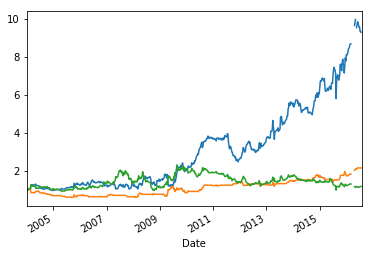

In [108]:
(1 + data.ret_google_cold).cumprod().plot()
(1 + data.ret_google_flu).cumprod().plot()
(1 + data.ret_tw9919).cumprod().plot()

In [143]:
import pandas
iphone = pandas.read_csv('iphone.csv', index_col='Date', parse_dates=True)

In [144]:
iphone.head()

,Iphone
Date,
2012-11-04,45
2012-11-11,44
2012-11-18,44
2012-11-25,43
2012-12-02,44


In [145]:
import pandas_datareader
import datetime
tw2317 =  pandas_datareader.get_data_yahoo('2317.TW', start=datetime.datetime(2012, 11, 1))

In [146]:
from datetime import datetime, timedelta
tw2317.index = tw2317.index.map(lambda e: e-timedelta(days=1))

In [147]:
results = tw2317.merge(iphone, left_index=True, right_index=True, how='inner')

In [148]:
data = results[['Adj Close', 'Iphone']]

In [149]:
data.head()

,Adj Close,Iphone
Date,,
2012-11-04,52.060505,45
2012-11-11,53.547951,44
2012-11-18,53.071976,44
2012-11-25,55.213951,43
2012-12-02,56.344368,44


In [150]:
data['Iphone_mavg'] = data['Iphone'].rolling(window= 3).mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [151]:
data.head()

,Adj Close,Iphone,Iphone_mavg
Date,,,
2012-11-04,52.060505,45,NaN
2012-11-11,53.547951,44,NaN
2012-11-18,53.071976,44,44.333333
2012-11-25,55.213951,43,43.666667
2012-12-02,56.344368,44,43.666667


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DB9C320>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000E747D68>], dtype=object)

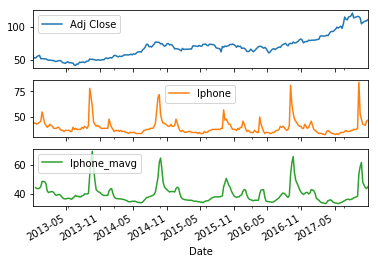

In [152]:
data.plot(kind= 'line', subplots=True)

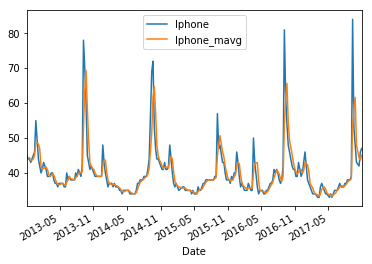

In [153]:
data[['Iphone', 'Iphone_mavg']].plot(kind = 'line')

In [154]:
data['ret_tw2317'] = data['Adj Close'].pct_change()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [155]:
data['Iphone_mavg'] = data['Iphone_mavg'].shift(1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [156]:
data['order'] = 0
# 黃金交叉做多
data['order'][data.Iphone > data.Iphone_mavg] = 1 
# 死亡交叉做空
data['order'][data.Iphone < data.Iphone_mavg] = -1
data.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5233: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2862: Setti

,Adj Close,Iphone,Iphone_mavg,ret_tw2317,order
Date,,,,,
2012-11-04,52.060505,45,NaN,NaN,0
2012-11-11,53.547951,44,NaN,0.028571,0
2012-11-18,53.071976,44,NaN,-0.008889,0
2012-11-25,55.213951,43,44.333333,0.040360,-1
2012-12-02,56.344368,44,43.666667,0.020473,1
2012-12-09,57.177364,45,43.666667,0.014784,1
2012-12-16,51.882034,46,44.000000,-0.092612,1
2012-12-23,52.239063,55,45.000000,0.006882,1
2013-01-06,51.644051,44,48.666667,-0.011390,-1


In [158]:
data['ret_tw2317'] = data['Adj Close'].pct_change()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [160]:
data['ret_tw2317'] = data['ret_tw2317'].shift(-1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [161]:
data['ret_google'] = data.order * data.ret_tw2317

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



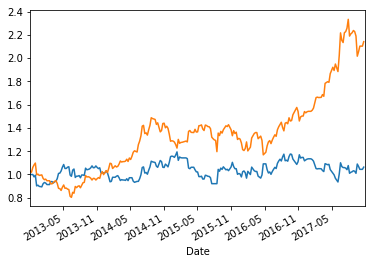

In [164]:
(1 + data.ret_google).cumprod().plot();
(1 + data.ret_tw2317).cumprod().plot();

## 語音客服

In [170]:
! pip install PyAudio

In [167]:
!pip install SpeechRecognition

In [191]:
import speech_recognition
r = speech_recognition.Recognizer()

with speech_recognition.Microphone() as source:
    r.adjust_for_ambient_noise(source)
    audio = r.listen(source)

In [192]:
r.recognize_google(audio, language='zh-TW')

'Google大數據'

In [182]:
! pip install gtts

  Running setup.py bdist_wheel for gtts: started
  Running setup.py bdist_wheel for gtts: finished with status 'done'
  Stored in directory: C:\Users\Student\AppData\Local\pip\Cache\wheels\ef\e7\2e\066d7be1514f7c7fd6c942f4d09ae5460f9a3125829782d03d
  Running setup.py bdist_wheel for gtts-token: started
  Running setup.py bdist_wheel for gtts-token: finished with status 'done'
  Stored in directory: C:\Users\Student\AppData\Local\pip\Cache\wheels\a9\19\5d\2abe941153d0331bb7c2fbcd48ed8c36a67ca1d40bd572773e
Successfully built gtts gtts-token


In [183]:
from gtts import gTTS
tts = gTTS(text='您這期的帳單是八萬九千塊錢', lang='zh')
tts.save("hello4.mp3")

In [186]:
! pip install pygame

In [188]:

from pygame import mixer
mixer.init()


In [189]:
import tempfile
def speak(sentence):
    with tempfile.NamedTemporaryFile(delete=True) as fp:
        tts = gTTS(text=sentence, lang='zh')
        tts.save("{}.mp3".format(fp.name))
        mixer.music.load('{}.mp3'.format(fp.name))
        mixer.music.play()

In [190]:
speak('九四八七九四狂')

## Google 大數據搜尋

In [204]:
import speech_recognition
r = speech_recognition.Recognizer()

with speech_recognition.Microphone() as source:
    r.adjust_for_ambient_noise(source)
    audio = r.listen(source)

question = r.recognize_google(audio, language='zh-TW')
search_term = question.lstrip('Google')


import requests
from bs4 import BeautifulSoup
res = requests.get('https://zh.wikipedia.org/wiki/{}'.format(search_term))
soup = BeautifulSoup(res.text, 'html.parser')
speak(soup.select('.mw-parser-output p')[0].text)

## 貸款違約用戶探勘

In [209]:
import pandas
trainset = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/pyfintech/master/Lab3/Training50.csv', index_col=0)

In [212]:
trainset.columns

Index(['Creditability', 'Account.Balance', 'Duration.of.Credit..month.',
       'Payment.Status.of.Previous.Credit', 'Purpose', 'Credit.Amount',
       'Value.Savings.Stocks', 'Length.of.current.employment',
       'Instalment.per.cent', 'Sex...Marital.Status', 'Guarantors',
       'Duration.in.Current.address', 'Most.valuable.available.asset',
       'Age..years.', 'Concurrent.Credits', 'Type.of.apartment',
       'No.of.Credits.at.this.Bank', 'Occupation', 'No.of.dependents',
       'Telephone', 'Foreign.Worker'],
      dtype='object')

In [213]:
trainset.isnull().values.any()

False

In [223]:
a = [{'uid':'a', 'val':1}, {'uid':'b', 'val':2}, {'uid':'a', 'val':3}]
df = pandas.DataFrame(a)
c = pandas.get_dummies(df['uid'])
df = pandas.concat([df, c], axis = 1)
del df['uid']
df

,val,a,b
0,1,1,0
1,2,0,1
2,3,1,0


In [215]:
trainfeature = trainset[[u'Account.Balance',u'Duration.of.Credit..month.',
                         u'Payment.Status.of.Previous.Credit',u'Purpose',
                         u'Credit.Amount',u'Value.Savings.Stocks',
                         u'Length.of.current.employment',u'Instalment.per.cent',
                         u'Sex...Marital.Status',u'Guarantors',
                         u'Duration.in.Current.address',
                         u'Most.valuable.available.asset',u'Age..years.',
                         u'Concurrent.Credits',u'Type.of.apartment',
                         u'No.of.Credits.at.this.Bank',u'Occupation',
                         u'No.of.dependents',u'Telephone',u'Foreign.Worker']]

traintarget = trainset['Creditability']

In [233]:
from sklearn import tree
clf=tree.DecisionTreeClassifier(max_depth=5)
clf=clf.fit(trainfeature,traintarget)

In [234]:
predicted = clf.predict(trainfeature)

In [235]:
from sklearn.metrics import accuracy_score
accuracy_score(traintarget, predicted)

0.84599999999999997

In [236]:
import pandas
testset = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/pyfintech/master/Lab3/Test50.csv', index_col=0)

In [237]:
testfeature = testset[[u'Account.Balance',u'Duration.of.Credit..month.',
                         u'Payment.Status.of.Previous.Credit',u'Purpose',
                         u'Credit.Amount',u'Value.Savings.Stocks',
                         u'Length.of.current.employment',u'Instalment.per.cent',
                         u'Sex...Marital.Status',u'Guarantors',
                         u'Duration.in.Current.address',
                         u'Most.valuable.available.asset',u'Age..years.',
                         u'Concurrent.Credits',u'Type.of.apartment',
                         u'No.of.Credits.at.this.Bank',u'Occupation',
                         u'No.of.dependents',u'Telephone',u'Foreign.Worker']]

testtarget = testset['Creditability']

In [238]:
predicted = clf.predict(testfeature)

In [239]:
from sklearn.metrics import accuracy_score
accuracy_score(testtarget, predicted)

0.68400000000000005

In [240]:
from sklearn.metrics import confusion_matrix
print(clf.classes_)
confusion_matrix(testtarget, predicted)

[0 1]


array([[ 60,  97],
       [ 61, 282]], dtype=int64)